<a href="https://colab.research.google.com/github/George-Amgad/Schedulify/blob/main/TimeTable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
week_days = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Sat']
week_days_full = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Saturday']
from copy import deepcopy

In [ ]:
class ScheduleError(Exception):
    pass

class Event:
    def __init__(self, name: str, day: str, *periods: int):
        # handle name
        if type(name) != str:
            raise TypeError("Event name must be a string")
        self.name = str(name)

        # handle invalid day input
        if type(day) != str:
            raise TypeError("Day must be a string")
        if day not in week_days:
            raise ValueError("Invalid day for an Event")

        # handle schedule
        if len(periods) == 0:
            raise ScheduleError("Event must have at least one period")

        for period in periods:
            if type(period) != int:
                raise TypeError("All periods must be int") # handle invalid period input

        # create list: days with the same size of periods
        days = []
        for i in range(len(periods)):
            days.append(day)

        # zip days with periods in a list: schedule
        self.schedule = list(zip(days, periods))

    def __repr__(self):
        day = self.schedule[0][0]
        periods = [self.schedule[i][1] for i in range(len(self.schedule))]
        text = f"Event('{self.name}', '{self.schedule[0][0]}'"
        for period in periods:
            text += f", {period}"
        text += ")"
        return text

    def __str__(self):
        day = self.schedule[0][0]
        periods = [self.schedule[i][1] for i in range(len(self.schedule))]
        return f"{self.name} on {week_days_full[week_days.index(day)]}, periods: {periods}"

In [ ]:
oop_lect = Event("Lecture", 'Sun', 1, 2)
oop_lab = Event("Lab", 'Sun', 3, 4)
print(oop_lab)

Lab on Sunday, periods: [3, 4]


In [ ]:
class Group:
    def __init__(self, name: str, *events: Event):
        # handle name
        if type(name) != str:
            raise TypeError("Group name must be a string")
        self.name = str(name)

        # handle events
        self.events = []
        for event in events:
            if type(event) != Event:
                raise TypeError("All events must be of type Event")
            self.events.append(event)

    def __repr__(self):
        text = f"Group('{self.name}'"
        for event in self.events:
            text += f", {event.__repr__()}"
        text += ")"
        return text

    def __str__(self):
        return '\n'.join([event.__str__() for event in self.events])

In [ ]:
oop_g1 = Group("G1", oop_lect, oop_lab)
print(oop_g1)
oop_g1

Lecture on Sunday, periods: [1, 2]
Lab on Sunday, periods: [3, 4]


Group('G1', Event('Lecture', 'Sun', 1, 2), Event('Lab', 'Sun', 3, 4))

In [ ]:
class Subject:
    def __init__(self, name: str, cred_hours: int, *groups: Group):
        # handle name
        if type(name) != str:
            raise TypeError("Subject name must be a string")
        self.name = name

        # handle cred_hours
        if type(cred_hours) == int:
            self.cred_hours = cred_hours
        elif type(cred_hours) == float:
            self.cred_hours = int(cred_hours)
            print("Warning: cred_hours was converted from float to int")
        else:
            raise TypeError("Credit Hours must be an integer")

        # handle groups
        self.groups = []
        for group in groups:
            if type(group) != Group:
                raise TypeError("All groups must be of type Group")
            self.groups += [group]



    def __str__(self):
        text = f"""Subject:
\tName: {self.name}
\tCredit Hours: {self.cred_hours}\n"""

        for group in self.groups:
            text += f"\tSchedule ({group.name}):\n"
            group_lines = group.__str__().split('\n')
            for line in group_lines:
                if line:
                    text += f"\t\t{line}\n" # Adding 8 spaces for alignment
        return text

    def __repr__(self):
        text = f"Subject('{self.name}', {self.cred_hours}"
        for group in self.groups:
            text += f", {group.__repr__()}"
        text += ")"
        return text

In [ ]:
oop_lect2 = Event("Lecture", 'Mon', 1, 2)
oop_lab2 = Event("Lab", 'Tue', 3, 4)
oop_g2 = Group("G2", oop_lect2, oop_lab2)
oop = Subject("OOP", 5, oop_g1, oop_g2)
print(oop)

Subject:
	Name: OOP
	Credit Hours: 5
	Schedule (G1):
		Lecture on Sunday, periods: [1, 2]
		Lab on Sunday, periods: [3, 4]
	Schedule (G2):
		Lecture on Monday, periods: [1, 2]
		Lab on Tuesday, periods: [3, 4]



In [ ]:
class DuplicateSubjectError(ValueError):
    pass

class Table(dict):
    def __init__(self, size: int = 12):
        # initialize empty attributes
        self.subjects = []
        self.groups = []
        self.cred_hours = int() # total cerdit hours of all subjects in the table
        # handle dictionary properties
        day_schedules = [[None for i in range(size)] for i in range(len(week_days))] # a list of None values with a default size of 12
        super().__init__() # initialize dictionary behavior
        for i in range(len(week_days)):
            self[week_days[i]] = day_schedules[i]

    def get_cred_hours(self):
        self.cred_hours = 0
        for subject in self.subjects:
            self.cred_hours += subject.cred_hours
        return self.cred_hours

    # add the schedule of a group of a subject to the table, raise an error if an overlap exists
    def add_subject(self, subject: Subject, group_name: str):
        # handle invalid user input
        if type(subject) != Subject:
            raise TypeError("Subject must be of type Subject")
        if type(group_name) != str:
            raise TypeError("Group name must be a string")
        if group_name not in [group.name for group in subject.groups]:
            raise ValueError(f"No group named '{group_name}' was found")
        if subject in self.subjects:
            raise DuplicateSubjectError(f"Subject '{subject.name}' is already in the table")
        # accessing group schedule
        found_group = False
        for group in subject.groups:
            if group.name == group_name:
                found_group = True # Mark that the group was found
                for event in group.events:
                    for tup in event.schedule:
                        day = tup[0]
                        period = tup[1]
                        if self[day][period] != None:
                            raise ScheduleError("There is already a subject in this period")
                        # each cell in the table has a tuple containing the subject, the group name and the event name
                        self[day][period] = (subject, group.name, event.name)
        if not found_group:
            raise ValueError(f"There is no group with this name '{group_name}' for subject {subject.name}")
        # add the subject to self.subjects
        self.subjects.append(subject)
        self.cred_hours = self.get_cred_hours()

    def merge(self, other: 'Table'):
        if type(other) != Table:
            raise TypeError("You can only merge a Table to another Table")
        for key, value in other.items(): # where each key-value pair represents a day's schedule
            for item in value:
                if self[key][value.index(item)] != None:
                    raise ScheduleError("There is already a subject in this period")
                self[key][value.index(item)] = item

    def __iadd__(self, other: 'Table'):
        if type(other) == Subject:
            self.merge(other)
        return self

    def __repr__(self):
        return "Table()"

    def __str__(self):
        text = "Schedule Table:\n"
        for day_index, day in enumerate(week_days):
            day_full_name = week_days_full[day_index]
            text += f"  {day_full_name}:\n"
            day_has_events = False
            for period_index, item in enumerate(self[day]):
                if item:
                    subject_obj, group_name, event_name = item
                    text += f"    Period {period_index}: {subject_obj.name} ({group_name}) - {event_name}\n"
                    day_has_events = True
            if not day_has_events:
                text += "    No events scheduled\n"
        text += f"Total Credit Hours: {self.get_cred_hours()}\n"
        return text

sample data and a function that attempts to create tables

In [ ]:
tbl = Table()
tbl.add_subject(oop, 'G1')
print(tbl)

Schedule Table:
  Sunday:
    Period 1: OOP (G1) - Lecture
    Period 2: OOP (G1) - Lecture
    Period 3: OOP (G1) - Lab
    Period 4: OOP (G1) - Lab
  Monday:
    No events scheduled
  Tuesday:
    No events scheduled
  Wednesday:
    No events scheduled
  Thursday:
    No events scheduled
Total Credit Hours: 5



In [ ]:
db_lect = Event('Lecture', 'Sun', 1, 2)
db_lab = Event('Lab', 'Mon', 3, 4)
db_g1 = Group("G1", db_lect, db_lab)
print(db_g1)

db = Subject('Database', 4, db_g1)
print(db)
print(oop)

Lecture on Sunday, periods: [1, 2]
Lab on Monday, periods: [3, 4]
Subject:
	Name: Database
	Credit Hours: 4
	Schedule (G1):
		Lecture on Sunday, periods: [1, 2]
		Lab on Monday, periods: [3, 4]

Subject:
	Name: OOP
	Credit Hours: 5
	Schedule (G1):
		Lecture on Sunday, periods: [1, 2]
		Lab on Sunday, periods: [3, 4]
	Schedule (G2):
		Lecture on Monday, periods: [1, 2]
		Lab on Tuesday, periods: [3, 4]



In [ ]:
import itertools

def build_tables(
    all_available_subjects: list, # List of Subject objects
    min_subjects: int,
    max_subjects: int,
    min_cred_hours: int,
    max_cred_hours: int,
    priority_subjects: list = None, # List of Subject objects
    num_tables_to_generate: int = 1,
) -> list: # Returns a list of Table objects
    """
    Generates a list of valid Table objects based on specified criteria,
    using a combinational approach for selecting subjects.
    Instead of random shuffling, it systematically explores combinations of subjects.

    Args:
        all_available_subjects: A list of all Subject objects that can be included.
        min_subjects: Minimum number of subjects required in a generated table.
        max_subjects: Maximum number of subjects allowed in a generated table.
        min_cred_hours: Minimum total credit hours required for a generated table.
        max_cred_hours: Maximum total credit hours allowed for a generated table.
        priority_subjects: An optional list of Subject objects to prioritize.
                           These subjects will always be included in the candidate set if possible.
        num_tables_to_generate: The desired number of valid tables to generate.

    Returns:
        A list of Table objects that satisfy all the given criteria.
    """
    valid_tables = []

    # 1. Separate priority and non-priority subjects that are actually available
    actual_priority_subjects = [s for s in (priority_subjects or []) if s in all_available_subjects]
    non_priority_available_subjects = [s for s in all_available_subjects if s not in actual_priority_subjects]

    # 2. Determine the range of how many non-priority subjects to add
    num_priority_actual = len(actual_priority_subjects)
    min_non_priority_to_add = max(0, min_subjects - num_priority_actual)
    max_non_priority_to_add = max_subjects - num_priority_actual

    # 3. Generate all candidate subject sets using combinations
    all_candidate_subject_sets = []
    for k in range(min_non_priority_to_add, max_non_priority_to_add + 1):
        if k < 0: # Ensure k is non-negative
            continue
        for non_priority_combo in itertools.combinations(non_priority_available_subjects, k):
            candidate_set = list(actual_priority_subjects) + list(non_priority_combo)
            # Add only if the total number of subjects is within bounds
            if min_subjects <= len(candidate_set) <= max_subjects:
                all_candidate_subject_sets.append(candidate_set)

    # 4. Iterate through each candidate set of subjects to try and build a table
    # Sort candidate sets for deterministic testing order (optional, but good for debugging)
    all_candidate_subject_sets.sort(key=lambda s_list: tuple(sorted(sub.name for sub in s_list)))


    for candidate_subjects_set in all_candidate_subject_sets:
        if len(valid_tables) >= num_tables_to_generate:
            break # Stop if enough tables are generated

        current_table = Table()
        subjects_successfully_added = []
        conflict_found_for_set = False # Flag to track if this specific set of subjects can be scheduled

        # Sort subjects within the set for a deterministic order of scheduling attempt
        subjects_to_schedule = sorted(candidate_subjects_set, key=lambda s: s.name)

        for subject in subjects_to_schedule:
            added_this_subject = False
            # Iterate through groups in a deterministic order (e.g., sorted by name)
            # No random shuffle here
            deterministic_groups = sorted(subject.groups, key=lambda g: g.name)

            for group in deterministic_groups:
                try:
                    # The add_subject method checks for conflicts before modifying the table.
                    # If ScheduleError is raised, the table's state remains unchanged, allowing
                    # us to try another group or declare the set unschedulable.
                    current_table.add_subject(subject, group.name)
                    subjects_successfully_added.append(subject)
                    added_this_subject = True
                    break # Subject successfully added with this group
                except ScheduleError:
                    continue # This group conflicted, try another for the same subject
                except DuplicateSubjectError:
                    # This should theoretically not happen if `candidate_subjects_set`
                    # contains unique subjects, which `itertools.combinations` ensures.
                    added_this_subject = True # Consider it added if already there
                    break
                except Exception as e:
                    print(f"Unexpected error adding subject {subject.name} group {group.name}: {e}")
                    conflict_found_for_set = True
                    break # An unexpected error occurred, give up on this subject set

            if not added_this_subject:
                # If the current subject could not be added with any of its groups,
                # then this entire `candidate_subjects_set` cannot form a valid table.
                conflict_found_for_set = True
                break

        if not conflict_found_for_set:
            # If all subjects in the candidate_subjects_set were successfully added,
            # now check if the total credit hours meet the criteria.
            current_cred_hours = current_table.get_cred_hours()

            if (min_cred_hours <= current_cred_hours <= max_cred_hours):
                valid_tables.append(current_table)

    if len(valid_tables) < num_tables_to_generate:
        print(f"Warning: Could only generate {len(valid_tables)} out of {num_tables_to_generate} requested tables after checking all viable combinations.")

    return valid_tables

# --- Example Usage ---
# Ensure 'oop' and 'db' Subject objects are defined in the notebook's global scope.
# They are defined in the user's provided notebook state.
all_known_subjects = [oop, db]

# Example 1: Generate one table with specific criteria
print("--- Generating 1 table (1-2 subjects, 4-10 cred hours) ---")
generated_tables_ex1 = build_tables(
    all_available_subjects=all_known_subjects,
    min_subjects=1,
    max_subjects=2,
    min_cred_hours=4,
    max_cred_hours=10,
    num_tables_to_generate=1
)

for i, table in enumerate(generated_tables_ex1):
    print(f"\n--- Generated Table {i+1} ---")
    print(f"Subjects: {[s.name for s in table.subjects]}")
    print(f"Total Credit Hours: {table.get_cred_hours()}")
    # To view the schedule details, you can uncomment the following lines:
    # print("\nDetailed Schedule:")
    # for day, schedule_periods in table.items():
    #     has_events = False
    #     day_full_name = week_days_full[week_days.index(day)] if day in week_days else day
    #     for period_idx, item in enumerate(schedule_periods):
    #         if item:
    #             has_events = True
    #             subject_obj, group_name, event_name = item
    #             print(f"  {day_full_name}, Period {period_idx}: Subject='{subject_obj.name}', Group='{group_name}', Event='{event_name}'")
    #     if not has_events:
    #         print(f"  {day_full_name}: No events")

# Example 2: Generate multiple tables with priority subjects
print("\n--- Generating 2 tables (1-2 subjects, 4-10 cred hours, OOP prioritized) ---")
my_priority_subjects = [oop] # Prioritize OOP

generated_tables_ex2 = build_tables(
    all_available_subjects=all_known_subjects,
    min_subjects=1,
    max_subjects=2,
    min_cred_hours=4,
    max_cred_hours=10,
    priority_subjects=my_priority_subjects,
    num_tables_to_generate=2
)

for i, table in enumerate(generated_tables_ex2):
    print(f"\n--- Generated Table {i+1} ---")
    print(f"Subjects: {[s.name for s in table.subjects]}")
    print(f"Total Credit Hours: {table.get_cred_hours()}")

--- Generating 1 table (1-2 subjects, 4-10 cred hours) ---

--- Generated Table 1 ---
Subjects: ['Database']
Total Credit Hours: 4

--- Generating 2 tables (1-2 subjects, 4-10 cred hours, OOP prioritized) ---

--- Generated Table 1 ---
Subjects: ['Database', 'OOP']
Total Credit Hours: 9

--- Generated Table 2 ---
Subjects: ['OOP']
Total Credit Hours: 5



--- Regenerating and displaying timetables with merged cells and wrapped text ---
Successfully loaded font from /usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf
Timetable visualization saved to timetable_merged_1.png
Successfully loaded font from /usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf
Timetable visualization saved to timetable_merged_2.png

Displaying timetable_merged_1.png:


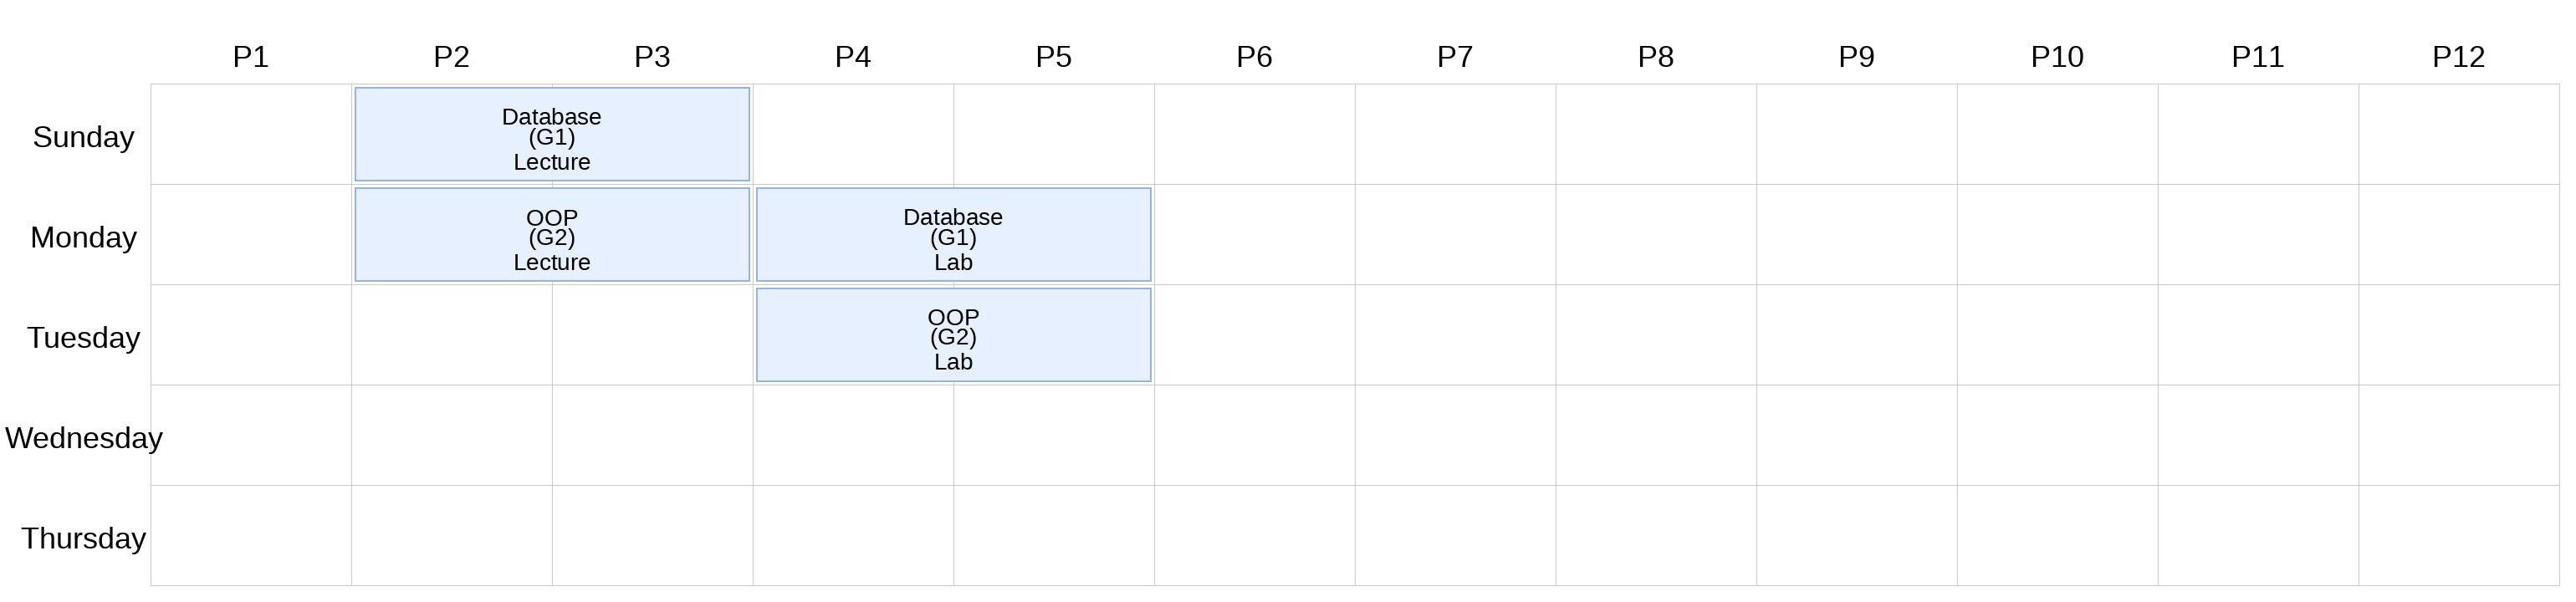


Displaying timetable_merged_2.png:


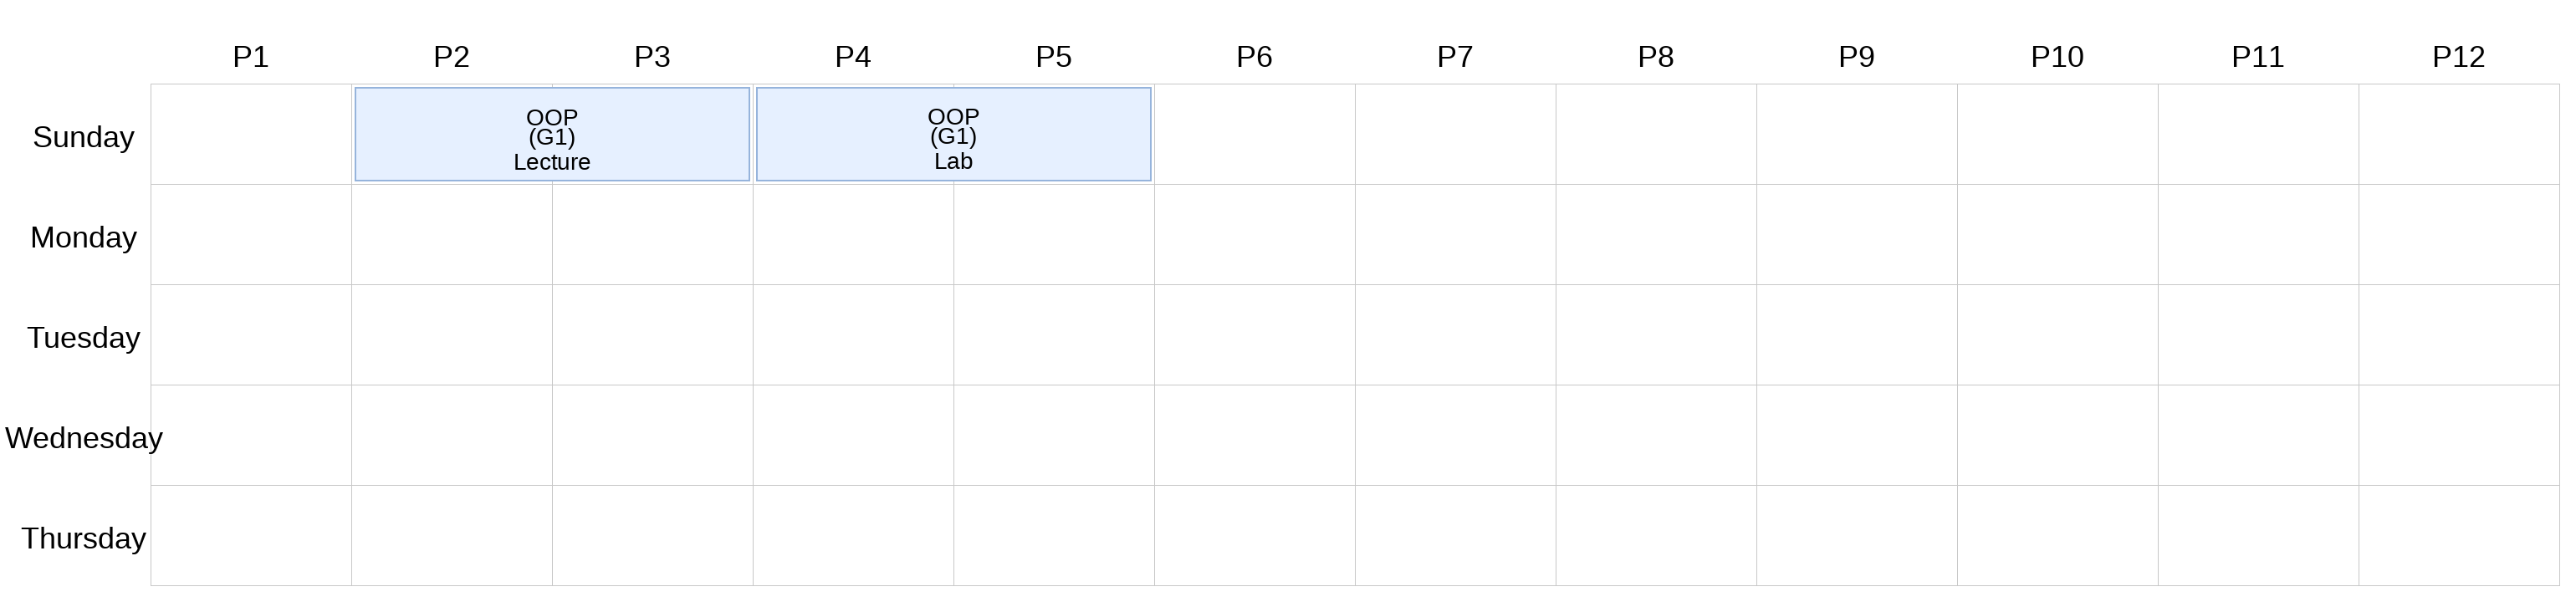

In [ ]:
from PIL import Image, ImageDraw, ImageFont
import os

def visualize_timetable(table: Table, filename: str = 'timetable.png'):
    """
    Generates an image visualizing a timetable from a Table object.

    Args:
        table: The Table object containing the schedule.
        filename: The name of the file to save the image (e.g., 'timetable.png').
    """
    # Define constants for visualization
    # Increased resolution factor (e.g., 2x for all dimensions)
    RESOLUTION_FACTOR = 2

    CELL_WIDTH = 120 * RESOLUTION_FACTOR
    CELL_HEIGHT = 60 * RESOLUTION_FACTOR
    HEADER_HEIGHT = 40 * RESOLUTION_FACTOR # Height for period labels at the top
    SIDE_BAR_WIDTH = 80 * RESOLUTION_FACTOR # Width for day labels on the left
    MARGIN = 10 * RESOLUTION_FACTOR
    BACKGROUND_COLOR = (255, 255, 255)  # White
    GRID_COLOR = (200, 200, 200)      # Light grey
    TEXT_COLOR = (0, 0, 0)            # Black
    EVENT_FILL_COLOR = (230, 240, 255) # Light blue
    EVENT_OUTLINE_COLOR = (150, 180, 220) # Medium blue

    # Determine number of days and periods
    num_days = len(week_days)
    max_periods = 12 # Max periods from the Table initialization

    # Calculate image dimensions (Periods as columns, Days as rows)
    img_width = SIDE_BAR_WIDTH + max_periods * CELL_WIDTH + 2 * MARGIN
    img_height = HEADER_HEIGHT + num_days * CELL_HEIGHT + 2 * MARGIN

    # Create image and drawing object
    image = Image.new('RGB', (img_width, img_height), BACKGROUND_COLOR)
    draw = ImageDraw.Draw(image)

    # Load font - try multiple paths before falling back to default
    font_paths = [
        "/usr/share/fonts/truetype/msttcorefonts/Arial.ttf", # Common on Linux
        "/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf",  # Often available
        "/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf", # Another common one
    ]

    # Base font sizes (will be scaled by RESOLUTION_FACTOR)
    base_font_size = 18
    base_font_small_size = 14

    font = ImageFont.load_default() # Initialize with default in case no TrueType font is found
    font_small = ImageFont.load_default()
    true_type_font_loaded = False

    for path in font_paths:
        try:
            font = ImageFont.truetype(path, base_font_size * RESOLUTION_FACTOR)
            font_small = ImageFont.truetype(path, base_font_small_size * RESOLUTION_FACTOR)
            true_type_font_loaded = True
            print(f"Successfully loaded font from {path}")
            break # Stop at the first successful font load
        except IOError:
            continue

    if not true_type_font_loaded:
        print("Warning: No TrueType font found from common paths. Using default bitmap font. Text size might be smaller than intended.")

    # Draw grid lines
    # Vertical lines (for periods)
    for i in range(max_periods + 1):
        x = SIDE_BAR_WIDTH + i * CELL_WIDTH + MARGIN
        draw.line([(x, HEADER_HEIGHT + MARGIN), (x, img_height - MARGIN)], fill=GRID_COLOR, width=1)
    # Horizontal lines (for days)
    for i in range(num_days + 1):
        y = HEADER_HEIGHT + i * CELL_HEIGHT + MARGIN
        draw.line([(SIDE_BAR_WIDTH + MARGIN, y), (img_width - MARGIN, y)], fill=GRID_COLOR, width=1)

    # Draw period labels (headers - P1 to P12)
    for i in range(max_periods): # i from 0 to 11
        period_label_text = f"P{i+1}" # Display P1 to P12
        x_center = SIDE_BAR_WIDTH + i * CELL_WIDTH + MARGIN + CELL_WIDTH / 2
        y_center = MARGIN + HEADER_HEIGHT / 2

        # Calculate text bounding box to center it
        bbox = draw.textbbox((0, 0), period_label_text, font=font)
        text_width = bbox[2] - bbox[0]
        text_height = bbox[3] - bbox[1]

        draw.text((x_center - text_width / 2, y_center - text_height / 2), period_label_text, fill=TEXT_COLOR, font=font)

    # Draw day labels (side bar)
    for day_idx, day_abbr in enumerate(week_days):
        day_full = week_days_full[day_idx]
        x_center = MARGIN + SIDE_BAR_WIDTH / 2
        y_center = HEADER_HEIGHT + day_idx * CELL_HEIGHT + MARGIN + CELL_HEIGHT / 2

        # Calculate text bounding box to center it
        bbox = draw.textbbox((0, 0), day_full, font=font)
        text_width = bbox[2] - bbox[0]
        text_height = bbox[3] - bbox[1]

        draw.text((x_center - text_width / 2, y_center - text_height / 2), day_full, fill=TEXT_COLOR, font=font)

    # --- Detect Merged Events --- (from previous step)
    merged_events = {}

    for day_idx, day_abbr in enumerate(week_days):
        day_schedule = table[day_abbr]
        merged_events[day_abbr] = []
        period_ptr = 0

        while period_ptr < max_periods:
            current_item = day_schedule[period_ptr]

            if current_item is not None:
                subject_obj, group_name, event_name = current_item
                start_period = period_ptr
                end_period = period_ptr

                # Check for consecutive identical events
                next_period_ptr = period_ptr + 1
                while next_period_ptr < max_periods:
                    next_item = day_schedule[next_period_ptr]
                    if next_item is not None and \
                       next_item[0].name == subject_obj.name and \
                       next_item[1] == group_name and \
                       next_item[2] == event_name:
                        end_period = next_period_ptr
                        next_period_ptr += 1
                    else:
                        break

                merged_events[day_abbr].append({
                    'subject': subject_obj,
                    'group': group_name,
                    'event': event_name,
                    'start_period': start_period,
                    'end_period': end_period
                })
                period_ptr = end_period + 1 # Move pointer past the merged block
            else:
                period_ptr += 1 # Move to the next period if current is empty

    # --- Draw Merged Cells (and text within them) --- (updated for text wrapping and centering)
    for day_idx, day_abbr in enumerate(week_days):
        for event_block in merged_events.get(day_abbr, []):
            subject_obj = event_block['subject']
            group_name = event_block['group']
            event_name = event_block['event']
            start_period = event_block['start_period']
            end_period = event_block['end_period']

            # Calculate coordinates for the merged event rectangle
            x1 = SIDE_BAR_WIDTH + start_period * CELL_WIDTH + MARGIN
            y1 = HEADER_HEIGHT + day_idx * CELL_HEIGHT + MARGIN
            x2 = SIDE_BAR_WIDTH + (end_period + 1) * CELL_WIDTH + MARGIN # +1 because end_period is inclusive
            y2 = y1 + CELL_HEIGHT

            # Draw event rectangle with padding
            event_padding = 2 * RESOLUTION_FACTOR
            draw.rectangle([(x1 + event_padding, y1 + event_padding), (x2 - event_padding, y2 - event_padding)],
                           fill=EVENT_FILL_COLOR, outline=EVENT_OUTLINE_COLOR, width=1 * RESOLUTION_FACTOR)

            # Prepare text lines for the event
            event_text = f"{subject_obj.name}\n({group_name})\n{event_name}"
            cell_inner_width = (x2 - x1) - 2 * event_padding
            cell_inner_height = (y2 - y1) - 2 * event_padding

            # Function to wrap text (as per instruction 2)
            def wrap_text(text, font, max_width, draw_obj):
                lines = []
                current_line = []
                words = text.replace('\n', ' \n ').split(' ')

                for word in words:
                    if word == '\n': # Handle explicit newlines
                        lines.append(" ".join(current_line))
                        current_line = []
                        continue

                    test_line = " ".join(current_line + [word])
                    bbox = draw_obj.textbbox((0, 0), test_line, font=font)
                    text_width = bbox[2] - bbox[0]

                    if text_width <= max_width:
                        current_line.append(word)
                    else:
                        if current_line:
                            lines.append(" ".join(current_line))
                        current_line = [word]
                if current_line:
                    lines.append(" ".join(current_line))
                return lines

            wrapped_lines = wrap_text(event_text, font_small, cell_inner_width, draw) # Instruction 4

            # Calculate total height of wrapped text block (Instruction 5)
            total_text_height = 0
            for line in wrapped_lines:
                bbox = draw.textbbox((0, 0), line, font=font_small)
                total_text_height += (bbox[3] - bbox[1])
            # Add line spacing
            total_text_height += (len(wrapped_lines) - 1) * (2 * RESOLUTION_FACTOR)

            # Vertical centering (Instruction 6)
            current_y = y1 + event_padding + (cell_inner_height - total_text_height) / 2

            for line in wrapped_lines: # Instruction 7
                bbox = draw.textbbox((0, 0), line, font=font_small)
                text_width = bbox[2] - bbox[0]
                text_height = bbox[3] - bbox[1]

                # Horizontal centering (Instruction 7b)
                draw.text(
                    (x1 + event_padding + (cell_inner_width - text_width) / 2, current_y),
                    line,
                    fill=TEXT_COLOR, font=font_small
                )
                current_y += text_height + (2 * RESOLUTION_FACTOR) # Line spacing (Instruction 7d)

    # Save the image
    image.save(filename)
    print(f"Timetable visualization saved to {filename}")

# --- Display Timetables --- (from previous execution)
if 'generated_tables_ex2' in globals() and generated_tables_ex2:
    print("\n--- Regenerating and displaying timetables with merged cells and wrapped text ---")
    visualize_timetable(generated_tables_ex2[0], 'timetable_merged_1.png')
    visualize_timetable(generated_tables_ex2[1], 'timetable_merged_2.png')

    from IPython.display import Image, display

    print("\nDisplaying timetable_merged_1.png:")
    display(Image('timetable_merged_1.png'))

    print("\nDisplaying timetable_merged_2.png:")
    display(Image('timetable_merged_2.png'))
else:
    print("generated_tables_ex2 not found or empty. Please run the previous cell to generate tables.")

In [ ]:
!pip install pdfplumber

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 85.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 93.3 MB/s eta 0:00:00


In [ ]:
from IPython.core.interactiveshell import page
import pdfplumber as pdf

def extract_schedule(pdf_path):
    with pdf.open(pdf_path) as file:
        page = file.pages[0]
        table = page.extract_table()
        for i in range(31):
            print(len(table[i]), table[i])

extract_schedule("CCEP Time Table 262_1.pdf")

13 ['2026 - 2025 - يناثلا يساردلا لصفلا لودج - تابساحلا و تلااصتلاا ةسدنه جمانرب\nىوافلخلا - ةكرتشملا داوملاو ىرفصلا ىوتسملا لودج', None, None, None, None, None, None, None, None, None, None, None, None]
13 ['', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
13 [None, '9:00 to 9:45', '9:45 to 10:30', '10:40 to 11:25', '11:25 to 12:10', '12:30 to 13:15', '13:15 to 14:00', '14:10 to 14:55', '2:55 to 15:40', '15:45 to 16:30', '16:30 to 17:15', '17:15-18:00', '18:00 to 18:45']
13 ['Sat.', '', None, None, None, None, None, None, None, None, None, None, None]
13 ['', '', None, None, None, 'GEN90A Elective (Leadership) Lect.', None, 'GEN908 Technical Writing Lect.', None, 'GEN90X Elective ‐ (Human resource) Lect.', None, None, None]
13 [None, None, None, None, None, 'GEN 301 Leadership Lect.', None, 'GEN201 Technical Writing Lect.', None, 'GEN402 Human resource Lect.', None, None, None]
13 [None, None, None, None, None, '', None, '', None, '', None, None, None]
13 [None, None,

In [ ]:
# DOESN'T WORK DOESN'T WORK DOESN'T WORK

from IPython.core.interactiveshell import page
import pdfplumber as pdf

# 'week_days' is assumed to be globally defined in the notebook context
# week_days = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Sat']

def extract_schedule(pdf_path):
    with pdf.open(pdf_path) as file:
        page = file.pages[0]

        # Tweak extract_table parameters to encourage merging and predictability
        settings = {
            "vertical_strategy": "lines",
            "horizontal_strategy": "lines",
            "intersection_tolerance": 10,  # Significantly increased
            "snap_tolerance": 10,          # Significantly increased
        }
        raw_table = page.extract_table(settings)

        if not raw_table:
            print("No table found with tweaked settings.")
            return

        # Simplified post-processing: generic fill-down for all days
        processed_table = []
        last_seen_day = None

        for r_idx, row in enumerate(raw_table):
            current_row_data = list(row)
            first_col_content = current_row_data[0]

            # Clean and normalize the day name (already robust)
            cleaned_day = None
            if first_col_content and isinstance(first_col_content, str):
                cleaned_day = first_col_content.strip().replace('.', '')
                if cleaned_day == 'Tues':
                    cleaned_day = 'Tue'
                elif cleaned_day == 'Thur':
                    cleaned_day = 'Thu'

            # Apply generic fill-down logic
            if cleaned_day in week_days:
                last_seen_day = cleaned_day
                current_row_data[0] = last_seen_day
            elif (first_col_content is None or (isinstance(first_col_content, str) and first_col_content.strip() == '')):
                # If the cell is empty/None, and we have a last_seen_day, fill it down
                if last_seen_day is not None:
                    current_row_data[0] = last_seen_day

            processed_table.append(current_row_data)

    print("--- Processed Schedule (Aggressive Line Merging + Simple Fill-Down) ---")
    for row in processed_table:
        # Print length and content of each row for observation
        print(len(row), row)

extract_schedule("CCEP Time Table 262_1.pdf")

--- Processed Schedule (Aggressive Line Merging + Simple Fill-Down) ---
12 ['2026 - 2025 - يناثلا يساردلا لصفلا لودج - تابساحلا و تلااصتلاا ةسدنه جمانرب\nىوافلخلا - ةكرتشملا داوملاو ىرفصلا ىوتسملا لودج\n1 2 3 4 5 6 7 8 9 10 11 12', None, None, None, None, None, None, None, None, None, None, None]
12 ['Sat', '9:00 to 9:45 9:45 to 10:30 10:40 to 11:25 11:25 to 12:10 12:30 to 13:15 13:15 to 14:00 14:10 to 14:55 2:55 to 15:40 15:45 to 16:30 16:30 to 17:15 17:15-18:00 18:00 to 18:45', None, None, None, None, None, None, None, None, None, None]
12 ['Sat', 'BAS014 Integral calculus and analytical geometry\nBAS015 Physics of Light, Heat and Magnetism Lec.', None, None, 'GEN90A Elective (Leadership) Lect.\nGEN 301 Leadership Lect.', None, 'GEN908 Technical Writing Lect.\nGEN201 Technical Writing Lect.', None, 'GEN90X Elective ‐ (Human resource) Lect.\nGEN402 Human resource Lect.\nBAS015 Physics of Light, Heat and Ma', None, None, None]
12 ['Sun', 'EMP104 Physics (2) Lec.\nBAS111 Numerical analy

Note that:

*   when None is present in the first column, this means that this row, along with some other rows, belongs to a cell.
*   the cell's value can be determined by looking above the None till we find a value.
*   ' ' (a space) represents the start of a detected empty cell




In [ ]:
with pdf.open("CCEP Time Table 262_1.pdf") as file:
    page = file.pages[0]
    help(page.extract_table)

Help on method extract_table in module pdfplumber.page:

extract_table(table_settings: Union[ForwardRef('TableSettings'), Dict[str, Any], NoneType] = None) -> Optional[List[List[Optional[str]]]] method of pdfplumber.page.Page instance



In [ ]:
import pdfplumber

def demonstrate_table_extraction_tweaks(pdf_path):
    with pdfplumber.open(pdf_path) as pdf:
        page = pdf.pages[0]

        print("--- Default Table Extraction ---")
        default_table = page.extract_table()
        if default_table:
            for i, row in enumerate(default_table[:5]): # Print first 5 rows
                print(f"Row {i}: {row}")
            print(f"... (total {len(default_table)} rows)")
        else:
            print("No table extracted with default settings.")

        print("\n--- Tweak 1: Relaxed Intersection Tolerance ---")
        # Useful when lines might have small gaps or not perfectly align
        settings_relaxed_tolerance = {
            "vertical_strategy": "lines",
            "horizontal_strategy": "lines",
            "intersection_tolerance": 5, # Default is 3, increase slightly
            "snap_tolerance": 3 # How close horizontal/vertical lines need to be to snap together
        }
        table_relaxed = page.extract_table(settings_relaxed_tolerance)
        if table_relaxed:
            for i, row in enumerate(table_relaxed[:5]):
                print(f"Row {i}: {row}")
            print(f"... (total {len(table_relaxed)} rows)")
        else:
            print("No table extracted with relaxed tolerance.")

        print("\n--- Tweak 2: Text-based Strategy (for tables without visible lines) ---")
        # Useful if the table structure is inferred purely from text alignment
        settings_text_strategy = {
            "vertical_strategy": "text",
            "horizontal_strategy": "text",
            "text_tolerance": 2, # Pixels to consider text aligned
            "intersection_tolerance": 5,
            "min_words_vertical": 2 # Minimum words to form a vertical line
        }
        table_text = page.extract_table(settings_text_strategy)
        if table_text:
            for i, row in enumerate(table_text[:5]):
                print(f"Row {i}: {row}")
            print(f"... (total {len(table_text)} rows)")
        else:
            print("No table extracted with text-based strategy.")

        print("\n--- Tweak 3: Exact Line Matching ---")
        # Stricter, requires lines to be explicitly present and well-aligned
        # When using 'explicit', you must provide the lines.

        # Get all lines detected by pdfplumber on the page
        all_lines = page.lines

        # Filter for vertical lines (x0 == x1, or very close) and extract their x0 coordinates
        vertical_lines = sorted(list(set([round(line['x0']) for line in all_lines if abs(line['x0'] - line['x1']) < 1])))
        # Filter for horizontal lines (y0 == y1, or very close) and extract their y0 coordinates
        horizontal_lines = sorted(list(set([round(line['y0']) for line in all_lines if abs(line['y0'] - line['y1']) < 1])))

        # Only attempt explicit strategy if enough lines are found
        if len(vertical_lines) >= 2 and len(horizontal_lines) >= 2:
            settings_exact_strategy = {
                "vertical_strategy": "explicit",
                "horizontal_strategy": "explicit",
                "explicit_vertical_lines": vertical_lines, # Pass the detected lines' x-coordinates
                "explicit_horizontal_lines": horizontal_lines, # Pass the detected lines' y-coordinates
                "intersection_tolerance": 1 # Very strict intersection
            }
            table_exact = page.extract_table(settings_exact_strategy)
            if table_exact:
                for i, row in enumerate(table_exact[:5]):
                    print(f"Row {i}: {row}")
                print(f"... (total {len(table_exact)} rows)")
            else:
                print("No table extracted with exact strategy.")
        else:
            print("Not enough explicit vertical or horizontal lines found to apply Exact Line Matching strategy.")

# Run the demonstration with your PDF file
demonstrate_table_extraction_tweaks("CCEP Time Table 262_1.pdf")

--- Default Table Extraction ---
Row 0: ['2026 - 2025 - يناثلا يساردلا لصفلا لودج - تابساحلا و تلااصتلاا ةسدنه جمانرب\nىوافلخلا - ةكرتشملا داوملاو ىرفصلا ىوتسملا لودج', None, None, None, None, None, None, None, None, None, None, None, None]
Row 1: ['', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']
Row 2: [None, '9:00 to 9:45', '9:45 to 10:30', '10:40 to 11:25', '11:25 to 12:10', '12:30 to 13:15', '13:15 to 14:00', '14:10 to 14:55', '2:55 to 15:40', '15:45 to 16:30', '16:30 to 17:15', '17:15-18:00', '18:00 to 18:45']
Row 3: ['Sat.', '', None, None, None, None, None, None, None, None, None, None, None]
Row 4: ['', '', None, None, None, 'GEN90A Elective (Leadership) Lect.', None, 'GEN908 Technical Writing Lect.', None, 'GEN90X Elective ‐ (Human resource) Lect.', None, None, None]
... (total 31 rows)

--- Tweak 1: Relaxed Intersection Tolerance ---
Row 0: ['2026 - 2025 - يناثلا يساردلا لصفلا لودج - تابساحلا و تلااصتلاا ةسدنه جمانرب\nىوافلخلا - ةكرتشملا داوملاو ىرفصلا ىوتسم